In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pitches = pd.read_csv("/Users/bradyhong/Downloads/archive/pitches.csv")

In [3]:
atbats = pd.read_csv('/Users/bradyhong/Downloads/archive/atbats.csv')

In [4]:
games = pd.read_csv('games.csv') 

In [5]:
names = pd.read_csv('/Users/bradyhong/Downloads/archive/player_names.csv')

In [6]:
# Merging pitches and atbats by ab_id
data = pd.merge(pitches, atbats, on = 'ab_id', how = 'left')

In [7]:
# Merging games data with pitches and atbats by g_id
data = pd.merge(data, games, on = 'g_id', how = 'left')

In [8]:
data1 = data.g_id.astype('str')

In [9]:
#Since the year is the first four characters, we will isolate those characters
data1 = data1.str[:4]

In [10]:
data1.value_counts()

2017    724618
2018    724444
2016    715803
2015    702289
Name: g_id, dtype: int64

In [11]:
data['year'] = data1.values

In [12]:
data1718 = data[data['year'] != '2015']

In [13]:
data1718 = data1718[data1718['year'] != '2016']

In [14]:
data1718.pitcher_id.value_counts()

434378    6973
453286    6612
543037    6557
519144    6480
461829    6409
          ... 
502143       7
534606       5
640447       3
448602       3
519203       2
Name: pitcher_id, Length: 997, dtype: int64

In [15]:
data1718['year'].value_counts()

2017    724618
2018    724444
Name: year, dtype: int64

In [22]:
data1718.to_csv("data1718.csv")

In [5]:
data1718 = pd.read_csv("data1718.csv")

In [23]:
data1718_merge = pd.DataFrame(data1718[['pitch_type', 'pitcher_id', 'year']])

In [24]:
data1718_merge

,pitch_type,pitcher_id,year
1418092,FF,593372,2017
1418093,FT,593372,2017
1418094,FT,593372,2017
1418095,SL,593372,2017
1418096,FT,593372,2017
...,...,...,...
2867149,SL,623352,2018
2867150,FF,623352,2018
2867151,FF,623352,2018
2867152,FF,623352,2018


In [25]:
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'AB']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'UN']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'EP']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'SC']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'PO']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'FO']

In [26]:
data1718_merge.dropna()

,pitch_type,pitcher_id,year
1418092,FF,593372,2017
1418093,FT,593372,2017
1418094,FT,593372,2017
1418095,SL,593372,2017
1418096,FT,593372,2017
...,...,...,...
2867149,SL,623352,2018
2867150,FF,623352,2018
2867151,FF,623352,2018
2867152,FF,623352,2018


In [27]:
pitcherid=set()
for i in data1718_merge.pitcher_id:
    pitcherid.add(i)

In [28]:
new_1718 = pd.DataFrame()
new_1718['pitcher_id'] = [i for i in pitcherid]
new_1718

,pitcher_id
0,466948
1,456713
2,622608
3,501789
4,596001
...,...
992,489448
993,475115
994,456696
995,624636


In [29]:
FF = 0
SL = 0
FT = 0
CH = 0
CU = 0
SI = 0
FC = 0
KC = 0
FS = 0
KN = 0
index = data1718_merge.index
count = 0
new_1718['FF'] = np.nan
new_1718['SL'] = np.nan
new_1718['FT'] = np.nan
new_1718['CH'] = np.nan
new_1718['CU'] = np.nan
new_1718['SI'] = np.nan
new_1718['FC'] = np.nan
new_1718['KC'] = np.nan
new_1718['FS'] = np.nan
new_1718['KN'] = np.nan
for j in pitcherid:
    for i in index:
        if data1718_merge.loc[i, "pitcher_id"] == j:   
            if data1718_merge.loc[i, "pitch_type"] == "FF":
                if data1718_merge.loc[i, "year"] == 2017:
                    FF += 1
                else:
                    FF += 4
            elif data1718_merge.loc[i, "pitch_type"] == "SL":
                if data1718_merge.loc[i, "year"] == 2017:
                    SL += 1
                else:
                    SL += 4
            elif data1718_merge.loc[i, "pitch_type"] == "FT":
                if data1718_merge.loc[i, "year"] == 2017:
                    FT += 1
                else:
                    FT += 4
            elif data1718_merge.loc[i, "pitch_type"] == "CH":
                if data1718_merge.loc[i, "year"] == 2017:
                    CH += 1
                else:
                    CH += 4
            elif data1718_merge.loc[i, "pitch_type"] == "CU":
                if data1718_merge.loc[i, "year"] == 2017:
                    CU += 1
                else:
                    CU += 4
            elif data1718_merge.loc[i, "pitch_type"] == "SI":
                if data1718_merge.loc[i, "year"] == 2017:
                    SI += 1
                else:
                    SI += 4
            elif data1718_merge.loc[i, "pitch_type"] == "FC":
                if data1718_merge.loc[i, "year"] == 2017:
                    FC += 1
                else:
                    FC += 4
            elif data1718_merge.loc[i, "pitch_type"] == "KC":
                if data1718_merge.loc[i, "year"] == 2017:
                    KC += 1
                else:
                    KC += 4
            elif data1718_merge.loc[i, "pitch_type"] == "FS":
                if data1718_merge.loc[i, "year"] == 2017:
                    FS += 1
                else:
                    FS += 4
            elif data1718_merge.loc[i, "pitch_type"] == "KN":
                if data1718_merge.loc[i, "year"] == 2017:
                    KN += 1
                else:
                    KN += 4
    total = FF+SL+FT+CH+CU+SI+KC+FS+KN+FC
    if total == 0:
        new_1718.loc[count, "FF"] = 0
        new_1718.loc[count, "SL"] = 0
        new_1718.loc[count, "FT"] = 0
        new_1718.loc[count, "CH"] = 0
        new_1718.loc[count, "CU"] = 0
        new_1718.loc[count, "SI"] = 0
        new_1718.loc[count, "FC"] = 0
        new_1718.loc[count, "KC"] = 0
        new_1718.loc[count, "FS"] = 0
        new_1718.loc[count, "KN"] = 0
    else:
        new_1718.loc[count, "FF"] = FF/total
        new_1718.loc[count, "SL"] = SL/total
        new_1718.loc[count, "FT"] = FT/total
        new_1718.loc[count, "CH"] = CH/total
        new_1718.loc[count, "CU"] = CU/total
        new_1718.loc[count, "SI"] = SI/total
        new_1718.loc[count, "FC"] = FC/total
        new_1718.loc[count, "KC"] = KC/total
        new_1718.loc[count, "FS"] = FS/total
        new_1718.loc[count, "KN"] = KN/total
    FF = 0
    SL = 0
    FT = 0
    CH = 0
    CU = 0
    SI = 0
    FC = 0
    KC = 0
    FS = 0
    KN = 0
    print(count)
    count+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
new_1718.to_csv("new_1718.csv")

In [31]:
new_1718.tail(30)

,pitcher_id,FF,SL,FT,CH,CU,SI,FC,KC,FS,KN
967,475054,0.077170,0.528403,0.394427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
968,446386,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
969,606131,0.088810,0.297809,0.538484,0.000000,0.000000,0.000000,0.000000,0.000000,0.074896,0.0
970,458676,0.413978,0.075269,0.188172,0.086022,0.091398,0.000000,0.145161,0.000000,0.000000,0.0
971,458677,0.705365,0.100370,0.008788,0.000925,0.000000,0.000000,0.184551,0.000000,0.000000,0.0
972,458681,0.406872,0.000000,0.377610,0.036824,0.068716,0.000000,0.109979,0.000000,0.000000,0.0
973,595897,0.342857,0.285714,0.371429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
974,599998,0.473451,0.469027,0.022124,0.035398,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
975,446399,0.261658,0.000000,0.000000,0.117228,0.000000,0.135363,0.166451,0.319301,0.000000,0.0
976,501697,0.155357,0.254464,0.465179,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [68]:
new_1718 = pd.read_csv("new_1718.csv", index_col=[0])

In [69]:
new_1718.head()

,pitcher_id,FF,SL,FT,CH,CU,SI,FC,KC,FS,KN
0,466948,0.476636,0.009346,0.056075,0.355140,0.102804,0.000000,0.000000,0.0,0.0,0.0
1,456713,0.482708,0.033113,0.194260,0.001472,0.166299,0.000000,0.122149,0.0,0.0,0.0
2,622608,0.687316,0.208278,0.000534,0.051802,0.052069,0.000000,0.000000,0.0,0.0,0.0
3,501789,0.140927,0.000000,0.000000,0.000000,0.348134,0.000000,0.510940,0.0,0.0,0.0
4,596001,0.288598,0.330122,0.000000,0.061941,0.066988,0.252351,0.000000,0.0,0.0,0.0


In [244]:
# Using only 2018 year
data18 = data[data['year'] == '2018']

In [145]:
# Merging the data with names
data18 = pd.merge(data18, names, left_on = 'pitcher_id', right_on = 'id')

In [146]:
# Making speed as numeric
data18['speed'] = data18['speed'].str[:-3]
data18['speed'] = data18.speed.astype('int')

In [147]:
# Changing to numeric
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data18['venue_name'] = number.fit_transform(data18['venue_name'])
data18['condition'] = number.fit_transform(data18['condition'])
data18['code'] = number.fit_transform(data18['condition'])

In [148]:
def new_column(row):
    if row['direction'][:1] == 'O':
        return 1
    elif row['direction'][:1] == 'I':
        return 2
    else:
        return 0

In [149]:
# Changind dirction value to 0,1,2
data18['direction'] = data18.apply(new_column, axis=1)

In [181]:
pXs = pd.DataFrame(data18[['pitch_type', 'b_score', 's_count', 'outs', 'pitch_num', \
                            'on_1b', 'on_2b', 'on_3b', 'batter_id', 'inning', 'p_score', 'p_throws',\
                             'pitcher_id', 'stand', 'top', 'b_count',\
                          'venue_name','speed', 'direction',\
                          'temperature', 'condition']])

In [151]:
pXs = new_data

In [163]:
pXs.code

0         5
1         5
2         5
3         5
4         5
         ..
724439    5
724440    5
724441    5
724442    5
724443    5
Name: code, Length: 724444, dtype: int64

In [2]:
pXs = new_data.to_csv("pXs.csv")

NameError: name 'new_data' is not defined

Now we can get more specific with our scrubbing to further clean our dataset. We will create a new DataFrame called pXs (pitch X situation) and reduce our columns to game situational data. As much of the pitches file is individual statistics on the pitch thrown, it would defeat the purpose of attempting to predict a pitch if the data of the pitch was provided.

In [43]:
pXs = pd.read_csv("pXs.csv", index_col=[0])

In [44]:
pXs = pd.merge(pXs, new_1718, on = 'pitcher_id')

In [45]:
pXs.isnull().sum()

pitch_type     6122
b_score           0
s_count           0
outs              0
pitch_num         0
on_1b             0
on_2b             0
on_3b             0
batter_id         0
inning            0
p_score           0
p_throws          0
pitcher_id        0
stand             0
top               0
b_count           0
venue_name        0
speed             0
direction         0
temperature       0
condition         0
FF                0
SL                0
FT                0
CH                0
CU                0
SI                0
FC                0
KC                0
FS                0
KN                0
dtype: int64

In [46]:
# Drop that has null pitch_type
pXs = pXs.dropna()

In [47]:
# Changing values to numeric
pXs.p_throws = pXs.p_throws.replace(['R', 'L'], [0,1])
pXs.stand = pXs.stand.replace(['R', 'L'], [0,1])
pXs.top = pXs.top.replace([True, False], [1,0])

In [48]:
pXs.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [49]:
# Deleting pitch types that have low value counts
pXs = pXs[pXs.pitch_type != 'AB']
pXs = pXs[pXs.pitch_type != 'UN']
pXs = pXs[pXs.pitch_type != 'EP']
pXs = pXs[pXs.pitch_type != 'SC']
pXs = pXs[pXs.pitch_type != 'PO']
pXs = pXs[pXs.pitch_type != 'FO']

In [42]:
# Recency Feature
from sklearn.preprocessing import LabelEncoder
def recency(depth):
    number = LabelEncoder()
    for a in range(depth):
        pXs["t-"+str(a+1)+" pitch_type"] = np.nan
    index = pXs.index 
    print(index)
    for j in range(len(index)-depth):
        if pXs.loc[index[j+depth], "pitcher_id"] == pXs.loc[index[j], "pitcher_id"]:
            for c in range(depth):
                past = pXs.loc[index[j+depth-c-1]]
                pXs.loc[index[j+depth], "t-"+str(c+1)+" pitch_type"] = past.pitch_type
    for d in range(depth):
        pXs['t-'+str(d+1)+' pitch_type'] = pXs['t-'+str(d+1)+' pitch_type'].astype('str')             
        pXs['t-'+str(d+1)+' pitch_type'] = number.fit_transform(pXs['t-'+str(d+1)+' pitch_type'])
recency(5)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            724434, 724435, 724436, 724437, 724438, 724439, 724440, 724441,
            724442, 724443],
           dtype='int64', length=717907)


KeyboardInterrupt: 

In [ ]:
pXs.to_csv("recency_feature.csv")

In [ ]:
pXs['code']

In [50]:
df = pXs

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717907 entries, 0 to 724443
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pitch_type   717907 non-null  object 
 1   b_score      717907 non-null  float64
 2   s_count      717907 non-null  float64
 3   outs         717907 non-null  float64
 4   pitch_num    717907 non-null  float64
 5   on_1b        717907 non-null  float64
 6   on_2b        717907 non-null  float64
 7   on_3b        717907 non-null  float64
 8   batter_id    717907 non-null  int64  
 9   inning       717907 non-null  int64  
 10  p_score      717907 non-null  int64  
 11  p_throws     717907 non-null  int64  
 12  pitcher_id   717907 non-null  int64  
 13  stand        717907 non-null  int64  
 14  top          717907 non-null  int64  
 15  b_count      717907 non-null  float64
 16  venue_name   717907 non-null  int64  
 17  speed        717907 non-null  int64  
 18  direction    717907 non-

In [52]:
features = pXs.drop('pitch_type', axis=1)

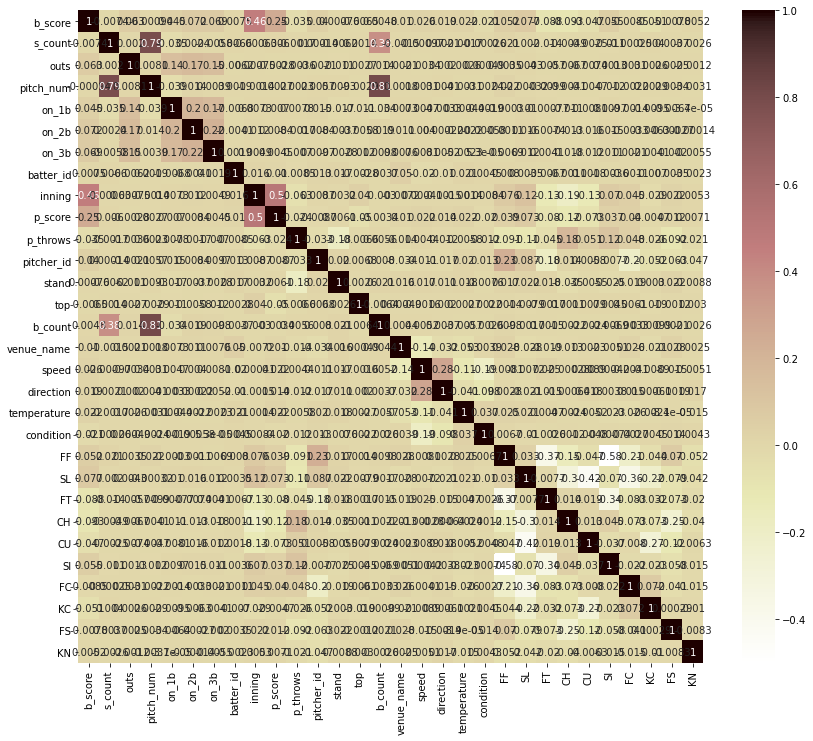

In [53]:
correlation = features.corr() 
plt.figure(figsize=(14,12)) 
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

In [54]:
# Drop pitch_num by looking at the correlation plots 
# pitch_num has strong correlation with b_count, s_count
features = features.drop('pitch_num', axis=1)

In [55]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717907 entries, 0 to 724443
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   b_score      717907 non-null  float64
 1   s_count      717907 non-null  float64
 2   outs         717907 non-null  float64
 3   on_1b        717907 non-null  float64
 4   on_2b        717907 non-null  float64
 5   on_3b        717907 non-null  float64
 6   batter_id    717907 non-null  int64  
 7   inning       717907 non-null  int64  
 8   p_score      717907 non-null  int64  
 9   p_throws     717907 non-null  int64  
 10  pitcher_id   717907 non-null  int64  
 11  stand        717907 non-null  int64  
 12  top          717907 non-null  int64  
 13  b_count      717907 non-null  float64
 14  venue_name   717907 non-null  int64  
 15  speed        717907 non-null  int64  
 16  direction    717907 non-null  int64  
 17  temperature  717907 non-null  int64  
 18  condition    717907 non-

In [56]:
# y value = pitch_type
target = df['pitch_type']

In [57]:
example = features

In [58]:
target_e = target

In [59]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score
import xgboost as xgb
import random
from sklearn.model_selection import GridSearchCV

In [49]:
#splitting the train and test data for the XGB model
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
#create xgb instance out of the box
clf = xgb.XGBClassifier(eval_metric='mlogloss', objective = 'multi:softprob')
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KeyboardInterrupt: 

In [111]:
# Doesn't work with n_jobs=-1. 
# 만약 계속 안되면 n_jobs=1로 해보셈
clf = xgb.XGBClassifier(eval_metric='mlogloss')
#clf.fit(X_train, y_train)
Xgb_train, Xgb_test, yxgb_train, yxgb_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
xgb_param_grid = {"learning_rate": [0.1,1],'max_depth': [2,6],'min_child_weight': [5,10],'n_estimators': [50, 100]}
gs = GridSearchCV(clf, xgb_param_grid, n_jobs=1, cv=3)
gs.fit(Xgb_train, yxgb_train)

/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KeyboardInterrupt: 

In [ ]:
gs.best_params_

In [ ]:
# put the parameter inside XGBClassifier that u got from gs.best_param
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
#create xgb instance with parameters
clf = xgb.XGBClassifier(learning_rate=1,max_depth=6,min_child_weight=10,n_estimators=50)
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

In [1]:
features.info()

NameError: name 'features' is not defined

In [367]:
# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_error = []
# Calculating error for K values of 1,4,9,16,25,36,49,64,81,100
for i in range(1, 50):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))
a = min(test_error)
for i in range(0,len(test_error)):
    if test_error[i]==a:
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
10


Text(0, 0.5, 'Error Rate')

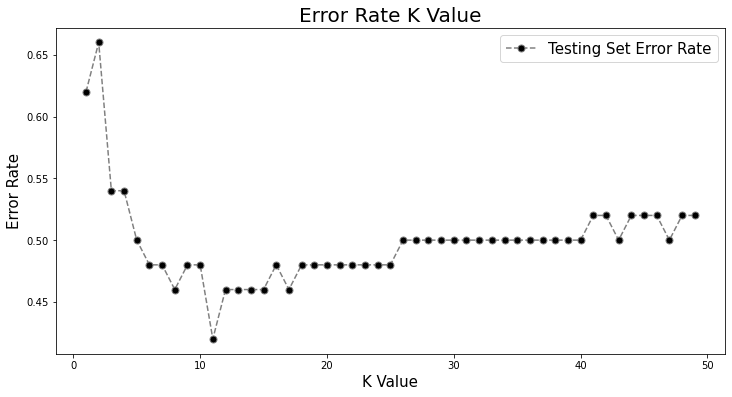

In [368]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), test_error, color='grey', linestyle='dashed', marker='o', 
         markerfacecolor='black', markersize=7, label='Testing Set Error Rate')
plt.legend(fontsize = 15)
plt.title('Error Rate K Value', fontsize = 20)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [369]:
print(a)

0.42


In [370]:
# Put the number that you got from KNN to n_neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [371]:
y_pred = classifier.predict(X_test)

In [372]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=True))

[[ 3  0  0  3  0]
 [ 1  1  0  4  0]
 [ 0  0  0  1  0]
 [ 2  0  0 24  0]
 [ 0  2  0  8  1]]
              precision    recall  f1-score   support

          CH       0.50      0.50      0.50         6
          FC       0.33      0.17      0.22         6
          FF       1.00      0.00      0.00         1
          SI       0.60      0.92      0.73        26
          SL       1.00      0.09      0.17        11

    accuracy                           0.58        50
   macro avg       0.69      0.34      0.32        50
weighted avg       0.65      0.58      0.50        50



In [429]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 50]

In [263]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_test, y_test)

accuracy_score(y_train, model.predict(X_train))

0.3477777777777778

In [60]:
le = LabelEncoder()
le.fit(target)
target_num = le.transform(target)  

In [61]:
X_train, X_test, y_train, y_test = train_test_split(example, target_num, \
                                                    test_size=0.1, random_state=77777)

# use DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
fit = xgb.XGBClassifier(eval_metric='mlogloss', objective = 'multi:softprob')
fit.fit(X_train,y_train)
# set xgboost params
param = {
    'max_depth': 10,  # the maximum depth of each tree
    'learning_rate': 0.1,  # the training step for each iteration
    'min_child_weight': 20,
   'n_estimators': 300,
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 10}  # the number of classes that exist in this datset
num_rounds=5
#------------- numpy array ------------------
#training and testing - numpy matrices
bst = xgb.train(param, dtrain,num_rounds)
preds = bst.predict(dtest)

#extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array test precision:", precision_score(y_test, best_preds, average='macro'))

[02:16:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:17:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Numpy array test precision: 0.5157385988688855


In [ ]:
xgb_param_grid = {'max_depth': [10,13],'min_child_weight': [15,20] \
                  ,'n_estimators': [250,300], 'num_rounds': [30,60,90]}
gs = GridSearchCV(fit, xgb_param_grid, n_jobs=-1, cv=3)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [62]:
preds.shape

(71791, 10)

In [63]:
print(preds[:7])

[[0.10154387 0.0771363  0.07672313 0.24282539 0.07671968 0.08741076
  0.0767188  0.0767168  0.0767177  0.10748763]
 [0.08143654 0.07524353 0.07523725 0.20680074 0.07523387 0.07706863
  0.12301062 0.07523105 0.07523192 0.13550583]
 [0.07244091 0.07241478 0.07240875 0.28113198 0.07240549 0.0724175
  0.13956232 0.07240278 0.07240362 0.07241189]
 [0.1462464  0.11162566 0.07590743 0.17621629 0.07590403 0.07988239
  0.07590315 0.07590117 0.07590207 0.10651144]
 [0.08913828 0.12787536 0.07421717 0.24207185 0.07421383 0.07422613
  0.07421298 0.07421105 0.07421192 0.09562138]
 [0.08686337 0.14952007 0.07270065 0.20430905 0.07269738 0.07329468
  0.07269655 0.07269465 0.0726955  0.1225281 ]
 [0.07276724 0.07624919 0.07273494 0.16285019 0.07273167 0.07495676
  0.07273084 0.07272895 0.0727298  0.24952036]]


In [64]:
#creating a dataframe for plotting purposes
plot = pd.DataFrame(data=preds[:,:], columns=['Changeup', 'Curveball', 'Cutter', 'Fastball_4S', \
                          'Splitter', 'Fastball_2S', 'Knucklecurve', 'Knuckleball', 'Sinker', \
                                              'Slider'])

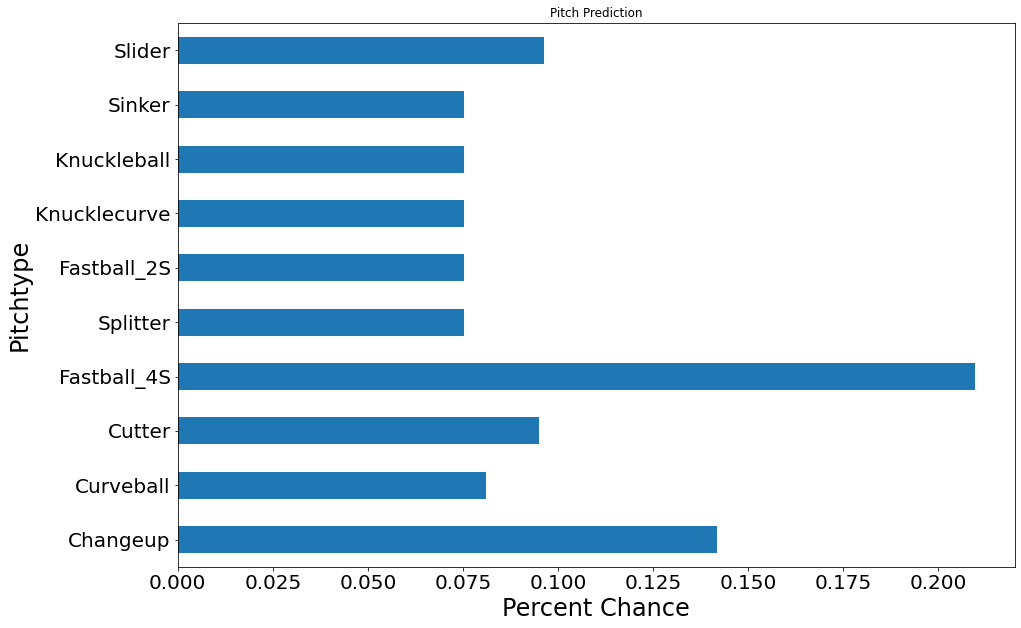

In [67]:
ax = plot.iloc[23].plot(kind='barh',title ="Pitch Prediction", figsize=(15, 10), fontsize=20)
ax.set_xlabel("Percent Chance", fontsize=24)
ax.set_ylabel("Pitchtype", fontsize=24)
plt.show()